<a href="https://www.kaggle.com/code/karthikreddy0101/spaceship-titanic?scriptVersionId=191793366" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [3]:
train_df=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.shape

(8693, 14)

In [5]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
train_df=train_df.drop(columns=['Name'])

In [7]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [8]:
train_df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

<Axes: xlabel='Transported', ylabel='count'>

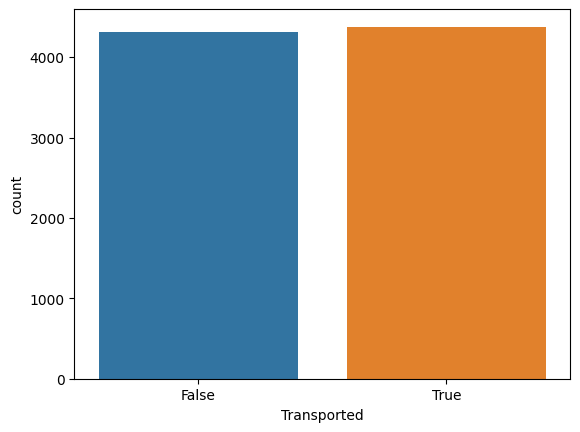

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_df,x='Transported')

## By using Simple Imputer I can replace all null values

In [10]:
import plotly.express as px
import warnings
miss_value_per = pd.DataFrame(train_df.isnull().sum() / len(train_df) * 100, columns=['percentage'])

# Reset the index to get column names as a separate column
miss_value_per.reset_index(inplace=True)
miss_value_per.columns = ['column', 'percentage']

# Create a bar plot
fig = px.bar(miss_value_per, x='column', y='percentage', title='Missing values in percentage', 
             labels={'percentage': 'Percentage of Missing Values', 'column': 'Columns'},
             color='column')  # This ensures each bin (column) has a different color

# Update layout
fig.update_layout(yaxis_title='Percentage', xaxis_title='Columns')

# Show the plot
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [11]:
from sklearn.impute import SimpleImputer

#to apply for all null values in a dataset
def get_parameters(train_df):
    parameters={}
    for col in train_df.columns[train_df.isnull().any()]:
        if train_df[col].dtype=='float64' or train_df[col].dtype=='int64' or train_df[col].dtype=='int32':
            strategy='mean'
        else:
            strategy='most_frequent'
        missing_values=train_df[col][train_df[col].isnull()].values[0]
        parameters[col]={'missing_values':missing_values,'strategy':strategy}
    return parameters
get_parameters(train_df)

{'HomePlanet': {'missing_values': nan, 'strategy': 'most_frequent'},
 'CryoSleep': {'missing_values': nan, 'strategy': 'most_frequent'},
 'Cabin': {'missing_values': nan, 'strategy': 'most_frequent'},
 'Destination': {'missing_values': nan, 'strategy': 'most_frequent'},
 'Age': {'missing_values': nan, 'strategy': 'mean'},
 'VIP': {'missing_values': nan, 'strategy': 'most_frequent'},
 'RoomService': {'missing_values': nan, 'strategy': 'mean'},
 'FoodCourt': {'missing_values': nan, 'strategy': 'mean'},
 'ShoppingMall': {'missing_values': nan, 'strategy': 'mean'},
 'Spa': {'missing_values': nan, 'strategy': 'mean'},
 'VRDeck': {'missing_values': nan, 'strategy': 'mean'}}

In [12]:
#to store parameters in new variable
parameters=get_parameters(train_df)

In [13]:
for col, param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    imp = SimpleImputer(missing_values=missing_values, strategy=strategy)

    transformed_col = imp.fit_transform(train_df[[col]]).reshape(-1)
    train_df[col] = transformed_col


In [14]:
train_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [17]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [18]:
train_df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               81
VIP                2
RoomService     1274
FoodCourt       1508
ShoppingMall    1116
Spa             1328
VRDeck          1307
Transported        2
dtype: int64

In [19]:
# Univariate Analysis
# Categorical Features
home_planet_counts = train_df['HomePlanet'].value_counts().reset_index()
home_planet_counts.columns = ['HomePlanet', 'count']
fig_home_planet = px.bar(home_planet_counts, x='HomePlanet', y='count', title='HomePlanet Distribution',color='HomePlanet')

fig_home_planet.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [20]:
destination_counts = train_df['Destination'].value_counts().reset_index()
destination_counts.columns = ['Destination', 'count']
fig_destination = px.bar(destination_counts, x='Destination', y='count', title='Destination Distribution',color='Destination')
fig_destination.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [21]:
# Numerical Features
fig_age = px.histogram(train_df, x='Age', title='Age Distribution', nbins=20, color_discrete_sequence=px.colors.qualitative.Plotly)
fig_age.show()

In [22]:
# Numerical Features
fig_room_service = px.histogram(train_df, x='RoomService', title='RoomService Distribution',
                                nbins=20, color_discrete_sequence=px.colors.qualitative.Plotly)
fig_room_service.show()

In [23]:
# Numerical vs Numerical
fig_age_vs_room_service = px.scatter(train_df, x='Age', y='RoomService', title='Age vs RoomService', 
                                     color='Age', color_continuous_scale=px.colors.sequential.Viridis)

fig_age_vs_room_service.show()

In [24]:
# Categorical vs Numerical
fig_home_planet_vs_age = px.box(train_df, x='HomePlanet', y='Age', title='HomePlanet vs Age', color='HomePlanet')


fig_home_planet_vs_age.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [25]:
fig_home_planet_vs_destination = px.histogram(train_df, x='HomePlanet', color='Destination', 
                                              barmode='group', title='HomePlanet vs Destination', 
                                              color_discrete_sequence=px.colors.qualitative.Plotly)


fig_home_planet_vs_destination.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [26]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_df['HomePlanet'] = label_encoder.fit_transform(train_df['HomePlanet'])

train_df['CryoSleep'] = label_encoder.fit_transform(train_df['CryoSleep'])

train_df['Cabin'] = label_encoder.fit_transform(train_df['Cabin'])

train_df['Destination'] = label_encoder.fit_transform(train_df['Destination'])

train_df['VIP'] = label_encoder.fit_transform(train_df['VIP'])

train_df['Transported'] = label_encoder.fit_transform(train_df['Transported'])





In [28]:
X=train_df.drop(columns=['Transported'])
y=train_df['Transported']

In [29]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0002_01,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0
2,0003_01,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0


In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

In [31]:
X_train[:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
2182,2336_02,1,0,46,2,44.0,1,1409.000000,910.0,17.0,1452.0,3782.0
1575,1669_02,2,1,3591,2,0.0,0,0.000000,0.0,0.0,0.0,0.0
8207,8771_01,0,0,5168,2,58.0,0,0.000000,805.0,3.0,3.0,0.0
7234,7736_01,2,0,1992,2,27.0,0,1730.000000,0.0,379.0,5.0,0.0
4450,4728_02,2,1,4392,2,49.0,0,224.687617,0.0,0.0,0.0,0.0


In [32]:
y_train[:4]

2182    0
1575    1
8207    0
7234    0
Name: Transported, dtype: int64

In [33]:
print("shape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)

shape of X_train (6954, 12)
shape of X_test (1739, 12)


In [34]:
import math
math.sqrt(len(y_test))

41.701318923986086

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.fit_transform(X_test)


In [37]:
# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=41,metric='manhattan')  # You can tune the number of neighbors (k)

# Fit the model to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=41)

In [38]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[658 194]
 [218 669]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       852
           1       0.78      0.75      0.76       887

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739


Accuracy Score:
0.7630822311673375


In [57]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(criterion="entropy",n_estimators=200,max_depth=10,min_samples_split=10,
                          max_features='log2',min_samples_leaf=2 )
clf1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [58]:
pred1=clf1.predict(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred1))
print("\nClassification Report:")
print(classification_report(y_test, pred1))
print("\nAccuracy Score:")
print(accuracy_score(y_test, pred1))

Confusion Matrix:
[[663 189]
 [195 692]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       852
           1       0.79      0.78      0.78       887

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739


Accuracy Score:
0.7791834387579069


In [59]:
pipeline=Pipeline([
    ('rf',RandomForestClassifier())
])

In [60]:
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 15],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2', None]
}

In [61]:
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)


Best Parameters:  {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best Cross-Validation Score:  0.8065865352290418


In [63]:
# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", test_accuracy)


Test Accuracy:  0.780333525014376


In [64]:
from sklearn.svm import SVC

# Step 3: Initialize and Train the SVC Model
svc = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svc.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = svc.predict(X_test)


# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[643 209]
 [182 705]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       852
           1       0.77      0.79      0.78       887

    accuracy                           0.78      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.78      0.78      1739


Accuracy Score:
0.7751581368602645


In [42]:
model = Sequential([
    Input(shape=(12,)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=200,
    verbose=1,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7229 - loss: 0.5512 - val_accuracy: 0.7908 - val_loss: 0.4318
Epoch 2/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7817 - loss: 0.4664 - val_accuracy: 0.7937 - val_loss: 0.4232
Epoch 3/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7908 - loss: 0.4420 - val_accuracy: 0.7987 - val_loss: 0.4224
Epoch 4/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8106 - loss: 0.4162 - val_accuracy: 0.7944 - val_loss: 0.4199
Epoch 5/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7972 - loss: 0.4251 - val_accuracy: 0.7987 - val_loss: 0.4133
Epoch 6/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8084 - loss: 0.4188 - val_accuracy: 0.8009 - val_loss: 0.4153
Epoch 7/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7966 - loss: 0.4168 - val_accuracy: 0.7944 - val_loss: 0.4145
Epoch 8/200
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8024 - loss: 0.4185 - val_accu

In [65]:
test_df=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [66]:
test_df=test_df.drop(columns=['Name'])

In [67]:
def get_parameters(test_df):
    parameters={}
    for col in test_df.columns[test_df.isnull().any()]:
        if test_df[col].dtype=='float64' or test_df[col].dtype=='int64' or test_df[col].dtype=='int32':
            strategy='mean'
        else:
            strategy='most_frequent'
        missing_values=test_df[col][test_df[col].isnull()].values[0]
        parameters[col]={'missing_values':missing_values,'strategy':strategy}
    return parameters
get_parameters(test_df)

{'HomePlanet': {'missing_values': nan, 'strategy': 'most_frequent'},
 'CryoSleep': {'missing_values': nan, 'strategy': 'most_frequent'},
 'Cabin': {'missing_values': nan, 'strategy': 'most_frequent'},
 'Destination': {'missing_values': nan, 'strategy': 'most_frequent'},
 'Age': {'missing_values': nan, 'strategy': 'mean'},
 'VIP': {'missing_values': nan, 'strategy': 'most_frequent'},
 'RoomService': {'missing_values': nan, 'strategy': 'mean'},
 'FoodCourt': {'missing_values': nan, 'strategy': 'mean'},
 'ShoppingMall': {'missing_values': nan, 'strategy': 'mean'},
 'Spa': {'missing_values': nan, 'strategy': 'mean'},
 'VRDeck': {'missing_values': nan, 'strategy': 'mean'}}

In [68]:
#to store parameters in new variable
parameters=get_parameters(test_df)

In [69]:
for col, param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    imp = SimpleImputer(missing_values=missing_values, strategy=strategy)

    transformed_col = imp.fit_transform(test_df[[col]]).reshape(-1)
    test_df[col] = transformed_col


In [70]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

test_df['HomePlanet'] = label_encoder.fit_transform(test_df['HomePlanet'])

test_df['CryoSleep'] = label_encoder.fit_transform(test_df['CryoSleep'])

test_df['Cabin'] = label_encoder.fit_transform(test_df['Cabin'])

test_df['Destination'] = label_encoder.fit_transform(test_df['Destination'])

test_df['VIP'] = label_encoder.fit_transform(test_df['VIP'])






In [ ]:
# Apply Standard Scaler
#test_df=st.fit_transform(test_df)


In [71]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,1,2784,2,27.000000,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,0,1867,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,1,257,0,31.000000,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,0,259,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,0,1940,2,20.000000,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,1,2679,2,34.000000,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,0,0,2691,2,42.000000,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,2,1,602,0,28.658146,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,1,0,603,2,28.658146,0,0.0,2680.0,0.0,0.0,523.0


In [72]:


# Step 9: Make predictions on test data
test_predictions = best_model.predict(test_df)

# Convert predictions from 1/0 to True/False
test_predictions = test_predictions.astype(bool)

# Step 10: Add predictions to the test dataset
test_df['Transported'] = test_predictions

# Replace 1 and 0 with True and False
#test_df['Transported'] = test_df['Transported'].replace({True: 'True', False: 'False'})

# Step 11: Save the id, text, and predictions to a new file
test_df[['PassengerId', 'Transported']].to_csv('spaceship_predictions.csv', index=False)
print("Predictions saved to 'spaceship_predictions.csv'.")


Predictions saved to 'spaceship_predictions.csv'.


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

